# Australian Open Predicition

## Data Loading

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get current working directory
src =  os.getcwd()
# Load data for male players
maleDF = pd.read_csv(src+'\\data\\ATP_matches.csv')
# Load data for female players
femaleDF = pd.read_csv(src+'\\data\\WTA_matches.csv')

# Display tensor sizes
print("Male data: \n" + str(maleDF.shape[0]) + " Observations of " + str(maleDF.shape[1]) + " Variables\n")
print("Female Data: \n" + str(femaleDF.shape[0]) + " Observations of " + str(femaleDF.shape[1]) + " Variables")

Male data: 
20807 Observations of 35 Variables

Female Data: 
13906 Observations of 35 Variables


c:\users\jasper\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11,12,13,14,17,18,24,25,26,27,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Show top of male dataframe
maleDF.head()

,Winner,Loser,Tournament,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won
0,Edouard Roger-Vasselin,Eric Prodon,Chennai,2-Jan-12,Hard,First Round,106,97,0,2,...,3,21,33,13,26,1,3,15,49,49
1,Dudi Sela,Fabio Fognini,Chennai,2-Jan-12,Hard,First Round,83,48,0,2,...,4,17,32,5,26,0,1,8,33,30
2,Go Soeda,Frederico Gil,Chennai,2-Jan-12,Hard,First Round,120,102,0,2,...,2,45,70,18,35,2,4,36,103,99
3,Yuki Bhambri,Karol Beck,Chennai,2-Jan-12,Hard,First Round,345,101,0,2,...,1,15,33,13,29,2,3,15,46,43
4,Yuichi Sugita,Olivier Rochus,Chennai,2-Jan-12,Hard,First Round,235,67,0,2,...,0,19,32,13,22,1,7,30,78,62


In [4]:
# Show top of female dataframe
femaleDF.head()

,Winner,Loser,Tournament,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won
0,Johanna Larsson,Lourdes Dominguez-Lino,Auckland,1-Jan-14,Hard,First Round,84,69,0.0,2,...,4,16,32,13,33,2,8,24,62,53
1,Ana Konjuh,Roberta Vinci,Auckland,1-Jan-14,Hard,First Round,259,14,0.0,2,...,1,34,65,10,23,5,6,30,68,74
2,Ayumi Morita,Lucie Safarova,Auckland,1-Jan-14,Hard,First Round,60,29,0.0,2,...,3,21,32,12,32,3,5,26,68,59
3,Venus Williams,Andrea Hlavackova,Auckland,1-Jan-14,Hard,First Round,47,134,0.0,2,...,4,23,34,12,28,2,6,30,82,65
4,Julia Goerges,Karin Knapp,Auckland,1-Jan-14,Hard,First Round,72,41,0.0,2,...,4,52,70,30,58,2,2,28,102,110


In [5]:
maleData = maleDF.head(100) 


# Columns that we wish to extract for winners of a match
winnerColumns = [  'Winner', 'Tournament_Date','Tournament', 'Winner_Sets_Won', \
                   'Winner_Games_Won', 'Winner_Aces', 'Winner_DoubleFaults', 'Winner_FirstServes_Won', 'Winner_FirstServes_In',\
                  'Winner_SecondServes_Won', 'Winner_SecondServes_In','Winner_BreakPoints_Won', 'Winner_BreakPoints', \
                  'Winner_ReturnPoints_Won', 'Winner_ReturnPoints_Faced', 'Winner_TotalPoints_Won']

# Columns that we wish to extract for losers of a match
loserColumns = [  'Loser', 'Tournament_Date','Tournament', 'Loser_Sets_Won', \
                   'Loser_Games_Won', 'Loser_Aces', 'Loser_DoubleFaults', 'Loser_FirstServes_Won', 'Loser_FirstServes_In',\
                  'Loser_SecondServes_Won', 'Loser_SecondServes_In','Loser_BreakPoints_Won', 'Loser_BreakPoints', \
                  'Loser_ReturnPoints_Won', 'Loser_ReturnPoints_Faced', 'Loser_TotalPoints_Won']


# Take a splice of male data containing winner data
maleWinnersDF = maleData.loc[:, winnerColumns ]


# Take a splice of male data containing loser data
maleLosersDF = maleData.loc[:, loserColumns]

# Group this data by tournament and player
groupedMaleLosers = maleLosersDF.groupby(['Loser', 'Tournament' ])
groupedMaleWinners = maleWinnersDF.groupby(['Winner', 'Tournament'])

# Statistics for each player
loserTournStatCols = [  'Loser_Sets_Won', 'Loser_Games_Won', 'Loser_Aces', 'Loser_DoubleFaults', \
                      'Loser_FirstServes_Won', 'Loser_FirstServes_In','Loser_SecondServes_Won', \
                      'Loser_SecondServes_In','Loser_BreakPoints_Won', 'Loser_BreakPoints', \
                  'Loser_ReturnPoints_Won', 'Loser_ReturnPoints_Faced', 'Loser_TotalPoints_Won']

winnerTournStatCols = ['Winner_Sets_Won', \
                   'Winner_Games_Won', 'Winner_Aces', 'Winner_DoubleFaults', 'Winner_FirstServes_Won', 'Winner_FirstServes_In',\
                  'Winner_SecondServes_Won', 'Winner_SecondServes_In','Winner_BreakPoints_Won', 'Winner_BreakPoints', \
                  'Winner_ReturnPoints_Won', 'Winner_ReturnPoints_Faced', 'Winner_TotalPoints_Won']



# Sum statistics for each player over each tournament
loserTournStats = groupedMaleLosers[loserTournStatCols].agg({x:'sum' for x in loserTournStatCols} )
winnerTournStats = groupedMaleWinners[winnerTournStatCols].agg({x:'sum' for x in winnerTournStatCols})

stats = ['Total_Sets_Won', 'Total_Games_Won', 'Total_Aces', 'Total_DoubleFaults', 'Total_FirstServes_Won',\
        'Total_FirstServes_In', 'Total_SecondServes_Won', 'Total_SecondServes_In', 'Total_BreakPoints_Won',\
        'Total_BreakPoints', 'Total_ReturnPoints_Won', 'Total_ReturnPoints_Faced', 'Total_Points_Won']

loserTournStats.columns = stats
winnerTournStats.columns = stats
print(winnerTournStats)
#loserTournStats = groupedMaleLosers['Loser_Sets_Won':'Loser_TotalPoints_Won'].agg('sum')



                                  Total_Sets_Won  Total_Games_Won Total_Aces  \
Winner                 Tournament                                              
Albert Ramos-Vinolas   Doha                    2               13          3   
Alex Bogomolov Jr.     Doha                    2               17          6   
                       Sydney                  2               13          2   
Alexandr Dolgopolov    Brisbane             2222               60      50163   
Andreas Beck           Chennai                 2               13          0   
Andreas Seppi          Doha                   22               25         54   
Andy Murray            Brisbane            22222               70    1093139   
Benjamin Becker        Doha                    2               13          3   
Benoit Paire           Chennai                 2               12          8   
Bernard Tomic          Brisbane              222               42       7108   
Bobby Reynolds         Sydney           

## Data Cleaning

In [6]:
# Function to replace "." with NaN in a dataframe
def replaceMissingWithNaN(dataFrame):
    for column in list(dataFrame.columns.values):
        if (dataFrame[column].dtype.name == 'object'):
            # Different encodings for none in the database
            dataFrame[column] = dataFrame[column].replace({".":np.nan})

In [7]:
# Function to replace "." and NaN with 0 in a slice
def replaceMissingWithZero(sliceDF):
    # Different encodings for none in the database
    sliceDF = sliceDF.replace({np.nan:0})
    return sliceDF

In [8]:
# Encodes the variables fed into the functions as catagorical, boolean and numeric
# preseving missing data if specified, changin to zeros otherwise
def changeDataTypes(dataFrame, catagorical, boolean, numeric):
    for variable in list(maleDF.columns.values):
        if variable in catagorical:
            dataFrame[variable] = dataFrame[variable].astype('category')
        elif variable in boolean:
            dataFrame[variable] = dataFrame[variable].astype('bool')
        elif variable in numeric:
            # Keep as a float as can't save variables as ints and keep NaNs
            dataFrame[variable] = dataFrame[variable].astype('float64')
        else:
            # Replaces missing with zeros and then saves as integers
            dataFrame[variable] = replaceMissingWithZero(dataFrame[variable])
            dataFrame[variable] = dataFrame[variable].astype('int64')

In [9]:
# Convert missing entries to Nan
replaceMissingWithNaN(maleDF)
replaceMissingWithNaN(femaleDF)

In [12]:
# Check the datatypes of variables loaded
# List of Catagorical data
catagories = {'Winner', 'Loser', 'Tournament', 'Tournament_Date',
              'Court_Surface', 'Round_Description'}
# Boolean
boolean = {'Retirement_Ind'}

# Numeric that should keep missing values
numeric = {'Winner_Rank', 'Loser_Rank'}

changeDataTypes(maleDF, catagories, boolean, numeric)
changeDataTypes(femaleDF, catagories, boolean, numeric)

print("===== MALE DATA =====")
print(maleDF.dtypes)
print("\n==== FEMALE DATA ====")
print(femaleDF.dtypes)

===== MALE DATA =====
Winner                       category
Loser                        category
Tournament                   category
Tournament_Date              category
Court_Surface                category
Round_Description            category
Winner_Rank                   float64
Loser_Rank                    float64
Retirement_Ind                   bool
Winner_Sets_Won                 int64
Winner_Games_Won                int64
Winner_Aces                     int64
Winner_DoubleFaults             int64
Winner_FirstServes_Won          int64
Winner_FirstServes_In           int64
Winner_SecondServes_Won         int64
Winner_SecondServes_In          int64
Winner_BreakPoints_Won          int64
Winner_BreakPoints              int64
Winner_ReturnPoints_Won         int64
Winner_ReturnPoints_Faced       int64
Winner_TotalPoints_Won          int64
Loser_Sets_Won                  int64
Loser_Games_Won                 int64
Loser_Aces                      int64
Loser_DoubleFaults          

# Summary Statistics

In [143]:
maleData = maleDF.head(500) 

# Columns that we wish to extract for winners of a match
winnerColumns = [  'Winner', 'Tournament_Date','Tournament','Court_Surface', 'Winner_Sets_Won', \
                   'Winner_Games_Won', 'Winner_Aces', 'Winner_DoubleFaults', 'Winner_FirstServes_Won', 'Winner_FirstServes_In',\
                  'Winner_SecondServes_Won', 'Winner_SecondServes_In','Winner_BreakPoints_Won', 'Winner_BreakPoints', \
                  'Winner_ReturnPoints_Won', 'Winner_ReturnPoints_Faced', 'Winner_TotalPoints_Won']

# Columns that we wish to extract for losers of a match
loserColumns = [  'Loser', 'Tournament_Date','Tournament', 'Court_Surface', 'Loser_Sets_Won', \
                   'Loser_Games_Won', 'Loser_Aces', 'Loser_DoubleFaults', 'Loser_FirstServes_Won', 'Loser_FirstServes_In',\
                  'Loser_SecondServes_Won', 'Loser_SecondServes_In','Loser_BreakPoints_Won', 'Loser_BreakPoints', \
                  'Loser_ReturnPoints_Won', 'Loser_ReturnPoints_Faced', 'Loser_TotalPoints_Won']

finalColumns = ['Player', 'Tournament_Date', 'Tournament', 'Court_Surface','Total_Sets_Won', 'Total_Games_Won', 'Total_Aces', 'Total_DoubleFaults', 'Total_FirstServes_Won',\
        'Total_FirstServes_In', 'Total_SecondServes_Won', 'Total_SecondServes_In', 'Total_BreakPoints_Won',\
        'Total_BreakPoints', 'Total_ReturnPoints_Won', 'Total_ReturnPoints_Faced', 'Total_Points_Won']

statCols = ['Total_Sets_Won', 'Total_Games_Won', 'Total_Aces', 'Total_DoubleFaults', 'Total_FirstServes_Won',\
        'Total_FirstServes_In', 'Total_SecondServes_Won', 'Total_SecondServes_In', 'Total_BreakPoints_Won',\
        'Total_BreakPoints', 'Total_ReturnPoints_Won', 'Total_ReturnPoints_Faced', 'Total_Points_Won']

# Take a splice of male data containing winner data
maleWinnersDF = maleData.loc[:, winnerColumns ]

# Take a splice of male data containing loser data
maleLosersDF = maleData.loc[:, loserColumns]

# Rename columns to match between winners and losers dataframe
maleWinnersDF.columns = finalColumns
maleLosersDF.columns = finalColumns

# Concatenate loser and winner dataframes
maleTournDF = pd.concat([maleWinnersDF, maleLosersDF])

# Group concatenated dataframe by Player, Tournament, Tournament Date and the Surface Type
maleTournSummaryDF = maleTournDF.groupby(['Player', 'Tournament', 'Tournament_Date','Court_Surface'])
aggregates = {x:'sum' for x in statCols}

# Calculate tournament summary statistics
maleTournSummaryDF = maleTournSummaryDF[statCols].agg(aggregates)

# Group by player and calculate lifetime summary statistics
maleLifeSummaryDF = maleTournSummaryDF.reset_index().groupby(['Player'])
maleLifeSummaryDF = maleLifeSummaryDF[statCols].agg(aggregates)



In [144]:
# Example of the tournament statistics and lifetime statistics
display(maleTournSummaryDF.loc[['Andreas Beck','David Goffin']])
display(maleLifeSummaryDF.loc[['Andreas Beck', 'David Goffin']])

Total_Sets_Won  \
Player       Tournament                 Tournament_Date Court_Surface                   
Andreas Beck Australian Open, Melbourne 16-Jan-12       Hard                        3   
             Chennai                    2-Jan-12        Hard                        3   
             Zagreb                     30-Jan-12       Indoor Hard                 1   
David Goffin Australian Open, Melbourne 16-Jan-12       Hard                        2   
             Chennai                    2-Jan-12        Hard                        5   

                                                                       Total_Games_Won  \
Player       Tournament                 Tournament_Date Court_Surface                    
Andreas Beck Australian Open, Melbourne 16-Jan-12       Hard                        23   
             Chennai                    2-Jan-12        Hard                        25   
             Zagreb                     30-Jan-12       Indoor Hard                 11   
David Goffin Australian Open, Melbourne 16-Jan-12       Hard                        25   
             Chennai                    2-Jan-12        Hard                        42   

                                                                       Total_Aces  \
Player       Tournament                 Tournament_Date Court_Surface               
Andreas Beck Australian Open, Melbourne 16-Jan-12       Hard                    2   
             Chennai                    2-Jan-12        Hard                    4   
             Zagreb                     30-Jan-12       Indoor Hard             3   
David Goffin Australian Open, Melbourne 16-Jan-12       Hard                    7   
             Chennai                    2-Jan-12        Hard                   24   

                                                                       Total_DoubleFaults  \
Player       Tournament                 Tournament_Date Court_Surface                       
Andreas Beck Australian Open, Melbourne 16-Jan-12       Hard                            8   
             Chennai                    2-Jan-12        Hard                            4   
             Zagreb                     30-Jan-12       Indoor Hard                     2   
David Goffin Australian Open, Melbourne 16-Jan-12       Hard                           12   
             Chennai                    2-Jan-12        Hard                           12   

                                                                       Total_FirstServes_Won  \
Player       Tournament                 Tournament_Date Court_Surface                          
Andreas Beck Australian Open, Melbourne 16-Jan-12       Hard                              58   
             Chennai                    2-Jan-12        Hard                              76   
             Zagreb                     30-Jan-12       Indoor Hard                       28   
David Goffin Australian Open, Melbourne 16-Jan-12       Hard                              72   
             Chennai                    2-Jan-12        Hard                             104   

                                                                       Total_FirstServes_In  \
Player       Tournament                 Tournament_Date Court_Surface                         
Andreas Beck Australian Open, Melbourne 16-Jan-12       Hard                             79   
             Chennai                    2-Jan-12        Hard                            118   
             Zagreb                     30-Jan-12       Indoor Hard                      44   
David Goffin Australian Open, Melbourne 16-Jan-12       Hard                             99   
             Chennai                    2-Jan-12        Hard                            145   

                                                                       Total_SecondServes_Won  \
Player       Tournament                 Tournament_Date Court_Surface                           
Andreas Beck Australian Open, Melbo

,Total_Sets_Won,Total_Games_Won,Total_Aces,Total_DoubleFaults,Total_FirstServes_Won,Total_FirstServes_In,Total_SecondServes_Won,Total_SecondServes_In,Total_BreakPoints_Won,Total_BreakPoints,Total_ReturnPoints_Won,Total_ReturnPoints_Faced,Total_Points_Won
Player,,,,,,,,,,,,,
Andreas Beck,7,59,9,14,162,241,69,136,13,35,142,380,373
David Goffin,7,67,31,24,176,244,94,173,12,43,143,395,413


In [13]:
# Check catagorical variables for unique values
# Print headers for columns
print('{:-^43}'.format('-'))
print('{:<28s}{:^15s}'.format('Variable', 'Unique Values'))
print('{:-^43}'.format('-'))

# Display the variable and number of unique values
for variable in list(maleDF.columns.values):
    if (maleDF[variable].dtype.name == 'category'):
        print('{:<28s}{:>12d}'.format(variable + ":", maleDF[variable].unique().size))

-------------------------------------------
Variable                     Unique Values 
-------------------------------------------
Winner:                              548
Loser:                               767
Tournament:                           86
Tournament_Date:                     255
Court_Surface:                         4
Round_Description:                     9


## Univariate Visualisation

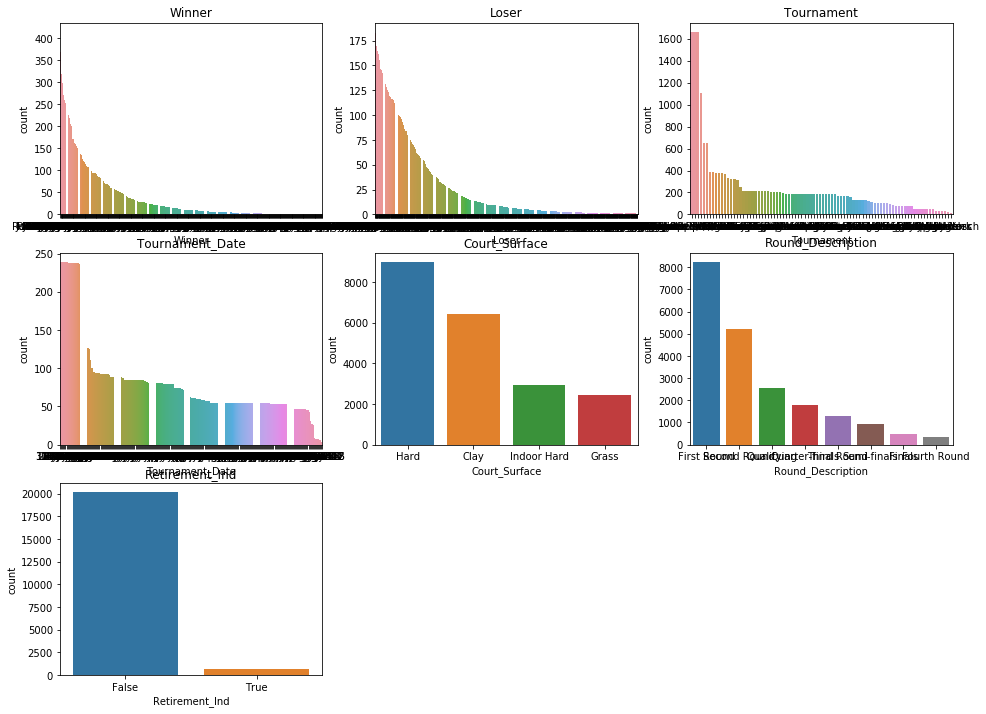

In [45]:
# Frequency of observations for different catagorical variables
# Long run time!
f = plt.figure(figsize=(16, 12))
counter = 1

for variable in list(maleDF.columns.values):
    if maleDF[variable].dtype.name == 'category' or maleDF[variable].dtype.name == 'bool':
        f.add_subplot(3, 3, counter)
        plt.title(variable)
        sns.countplot(x = variable, 
                      data = maleDF,
                      order = maleDF[variable].value_counts().index)
        counter +=1
        
# Save the plot
plt.savefig(src+'\\img\\AllCatagoricalBarCharts')  

These barcharts show the sample representation proportions of different categoires that split the data. Of particular interest is the a player that wins more often is likely to play more game overall than players how lose creating a sampling skew towards winners. Explicitly observed in the first two charts showing the highest sampled winner has over 400 matches recorded and the highest sampled loser is sampled slightly over 175 times. Tournament and Date are sampled in similar ways, starting with a large number of intial samples into a uniform mid-season and an undersampled final tournament. This is reflected in the structure of the overall season of the sport as players are intialy knocked out rapidly, play off and qualify for the final event. This is also seen in the sampling of rounds in each tournament with a large number of first round matches exponentially decaying towards the finals. Matches are most likely to be played on Hard or Clay surfaces that are outdoors, Grass being the least represented surface. The final chart shows that it is rare for a player to retire from a match.

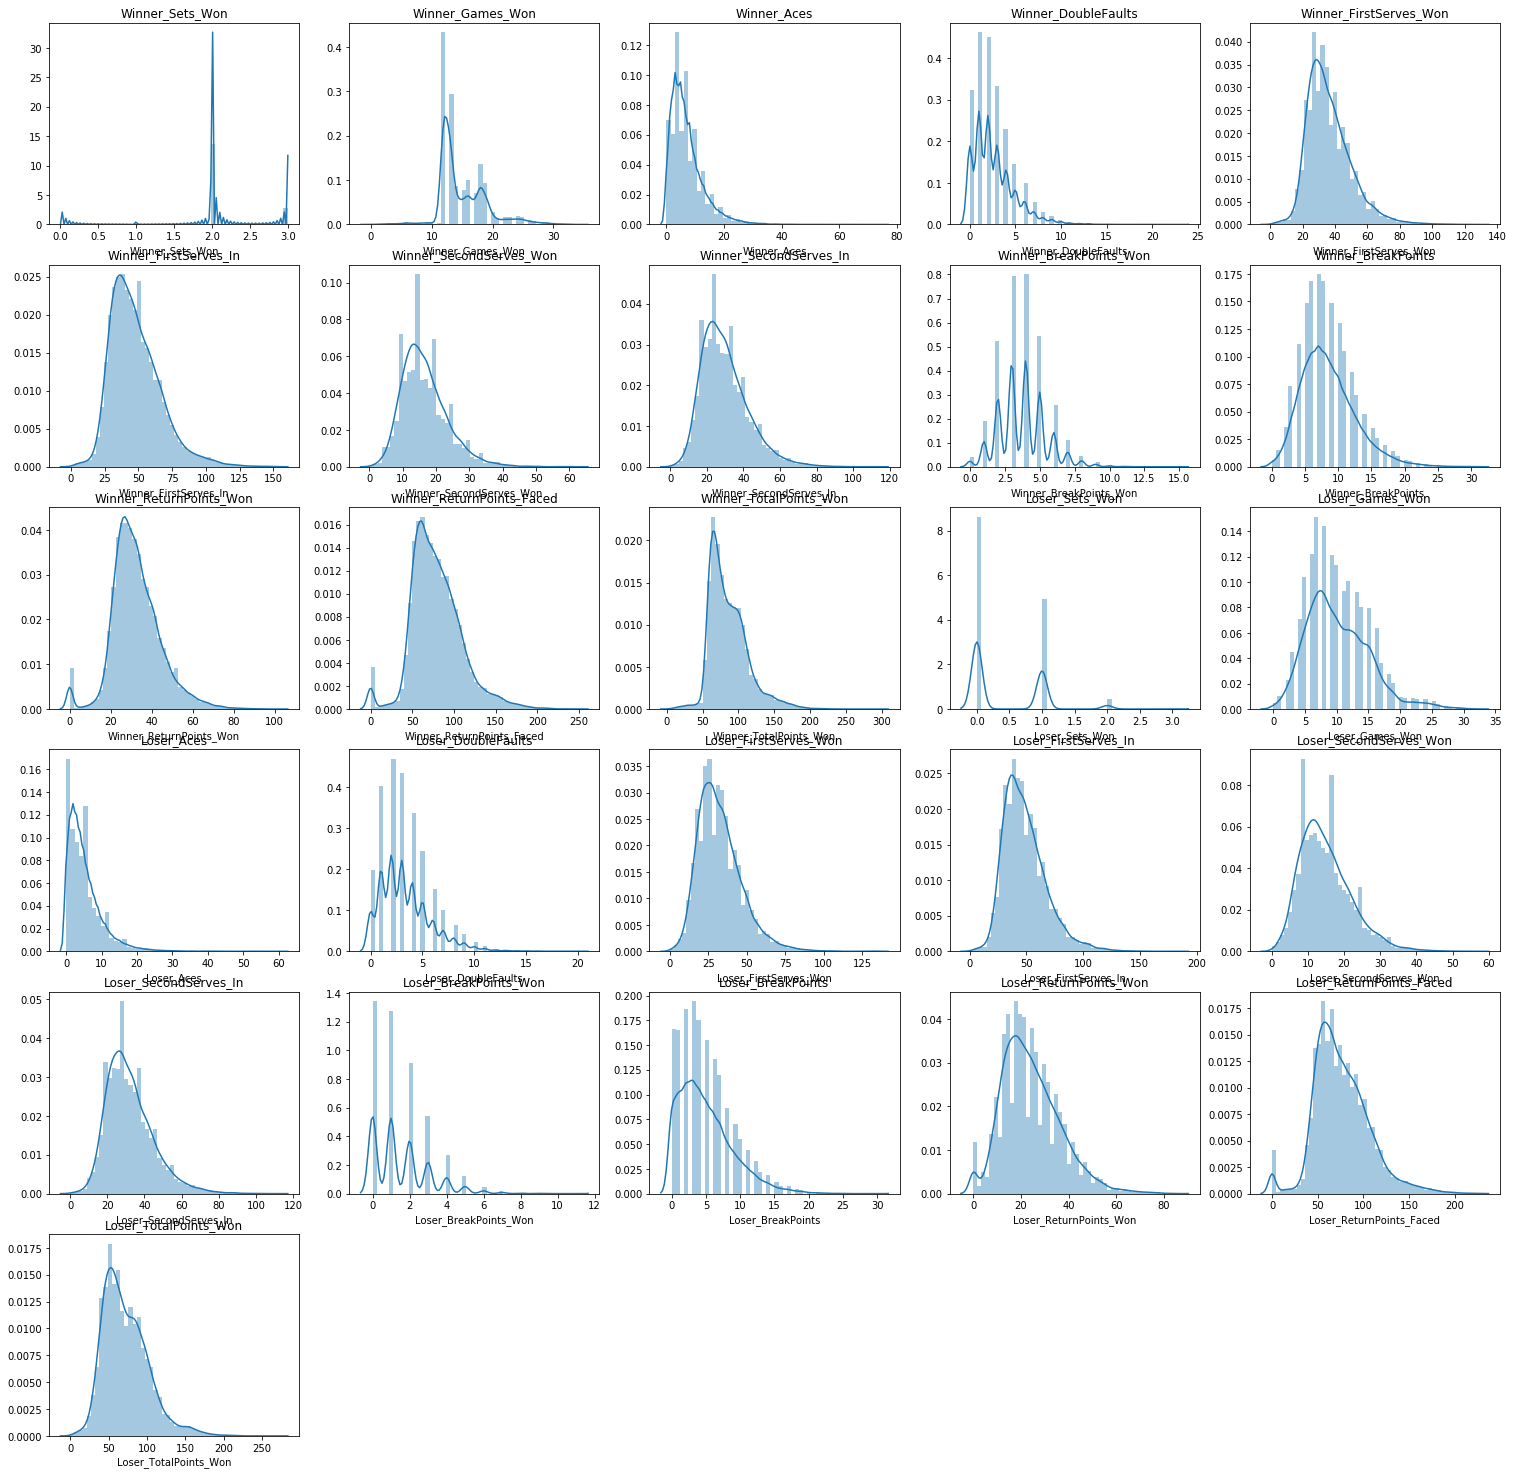

In [43]:
# Histograms for numeric data
f = plt.figure(figsize=(26, 26))
counter =1

for variable in list(maleDF.columns.values):
    if maleDF[variable].dtype.name == 'int64':
        f.add_subplot(6, 5, counter)
        plt.title(variable)
        sns.distplot(maleDF[variable])
        counter +=1
        
# Save the plot
plt.savefig(src+'\\img\\AllDiscreteHistograms')  

The above histograms relating to total points show that although a player is a loser/winner the ditribution of how many points they win overall approximates a normal distribution. In each distributions winners are have a higher observed mean than losers.  but the overall kurtosis and variance appear to be shared.

FileNotFoundError: [Errno 2] No such file or directory: 'src\\img\\TotalPointsWon.png'

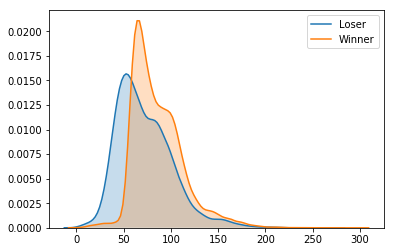

In [49]:
# An example of how the distribution of total points follows the a trend under some mean shift
snsPlot = sns.kdeplot(maleDF['Loser_TotalPoints_Won'], label = 'Loser', shade = True)
snsPlot = sns.kdeplot(maleDF['Winner_TotalPoints_Won'], label = 'Winner', shade = True)
snsPlot.figure.savefig("src\\img\\TotalPointsWon.png")